this file is to analyse the performance of DUBA using different kind of trigger

in the original paper, the author say they generate trigger randomly but did not propose method.

In [6]:
import numpy as np
import sys
from IPython.core.pylabtools import figsize

sys.path.append('../')
from tools.img import tensor2ndarray, ndarray2tensor
from torchvision.transforms.transforms import ToTensor, Resize, Compose
from tools.img import dct_2d_3c_full_scale
from tools.img import dwt_2d_3c, idwt_2d_3c
from PIL import Image
import torch
from tools.img import clip
import matplotlib.pyplot as plt
from tools.img import plot_space_target_space

torch.manual_seed(42)

In [7]:
trigger_1_path = '../resource/DUBA/64.png'
trigger_2_path = '../resource/example/000001.jpg'
scale = 224
trigger_1 = Image.open(trigger_1_path)
trigger_2 = Image.open(trigger_2_path)
trans = Compose([ToTensor(), Resize((scale, scale))])
trigger_1_tensor = trans(trigger_1)
trigger_2_tensor = trans(trigger_2)
trigger_1_ndarray = tensor2ndarray(trigger_1_tensor)
trigger_2_ndarray = tensor2ndarray(trigger_2_tensor)
trigger_1_ndarray.shape

(224, 224, 3)

In [8]:
tg_1_dct = dct_2d_3c_full_scale(trigger_1_ndarray.astype(float))
tg_2_dct = dct_2d_3c_full_scale(trigger_2_ndarray.astype(float))
tg_1_dct = clip(tg_1_dct)
tg_2_dct = clip(tg_2_dct)
tg_1_dct.shape

(224, 224, 3)

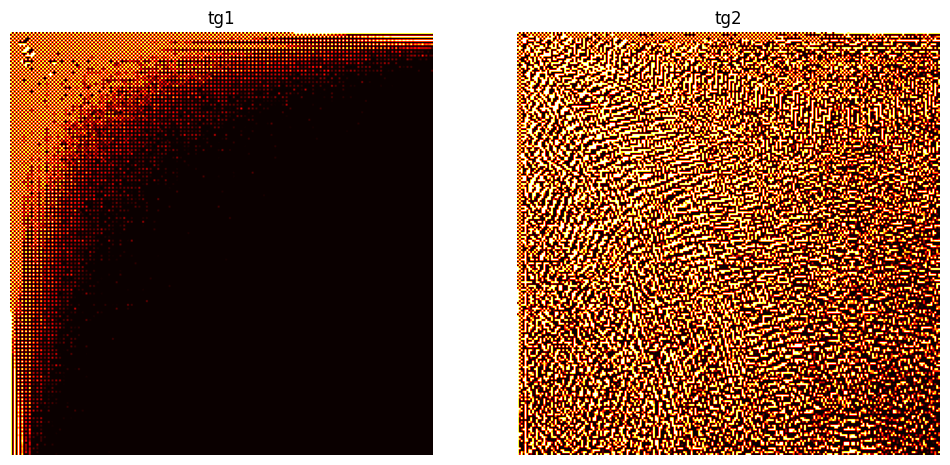

In [9]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(tg_1_dct[:, :, 0], cmap='hot')
ax[0].set_title('tg1')
ax[0].axis('off')
ax[1].imshow(tg_2_dct[:, :, 0], cmap='hot')
ax[1].set_title('tg2')
ax[1].axis('off')
plt.show()
res = tg_2_dct[:, :, 0]

/home/chengyiqiu/code/FBA/tools/img.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


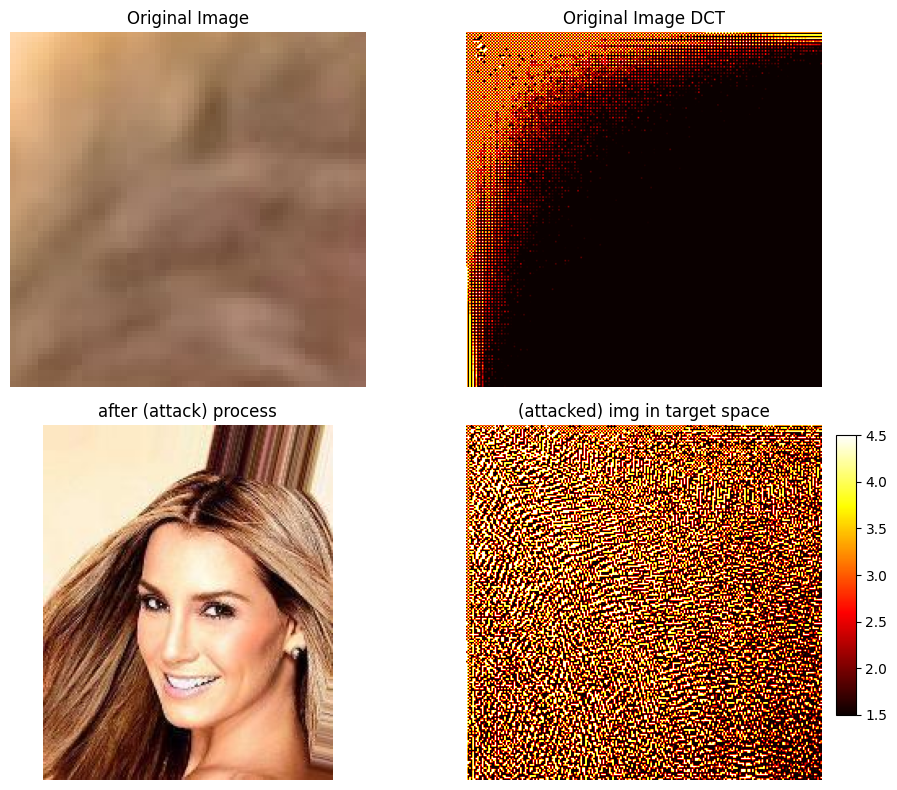

In [10]:
plot_space_target_space(trigger_1, tg_1_dct, trigger_2, tg_2_dct, True)